# Import Libraries

In [ ]:
!pip install mlxtend --upgrade --no-deps

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
class DataProcess:
          def __init__(self,df):
                 self.df = df
          
          def Numerical(df):
                 return df.select_dtypes(include = ['int64' , 'float64'])
            
          def Categorical(df):
                  return df.select_dtypes(include = ['object'])
                                          
          def Missing(df):
                                          
                  return sns.heatmap(df.isnull(), cbar = False, cmap='viridis')
                                          
          def correlation_map(df):
                f, ax = plt.subplots(figsize= (20,10))
                return sns.heatmap(data=df.corr(), annot = True);
            

In [ ]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import random
import statistics
import seaborn as sns
import plotly.express as px
from pprint import pprint

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor,AdaBoostRegressor, BaggingRegressor
from category_encoders import TargetEncoder 
encoder = TargetEncoder()
from sklearn.kernel_ridge import KernelRidge
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.linear_model import ElasticNet, ElasticNetCV
from sklearn.svm import SVR

from sklearn.model_selection import train_test_split, KFold, cross_val_score,GridSearchCV,RepeatedKFold, cross_validate, LeaveOneOut
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression, LinearRegression, Ridge, Lasso
from sklearn import neighbors
# Stats
from scipy.stats import skew, norm
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax
from yellowbrick.model_selection import FeatureImportances
from yellowbrick.model_selection import ValidationCurve

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA

pd.set_option('display.max_columns', None)

**LOADING THE DATASET AND MOUNTING MY DRIVE**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
file='/content/drive/My Drive/projects/adverts.csv'

1. **Data/Domain Understanding and Exploration**

In [ ]:
data_df =pd.read_csv(file) 

Data understanding and exploration refers to the process of reviewing and analyzing a dataset in order to gain a deeper understanding of the data, its characteristics, and any patterns or relationships that may exist within it. This step is crucial in the data science process as it helps to identify any potential issues or biases in the data, and inform the decisions made in later steps such as feature selection and modeling. Techniques used in data understanding and exploration include descriptive statistics, visualization, and data cleaning.

## 1.1 Meaning and Type of Features; Analysis of Univariate Distributions

Let quickly visualise our dataframe called data_df


In [ ]:
data_df.head()

,public_reference,mileage,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type
0,202006039777689,0.0,NaN,Grey,Volvo,XC90,NEW,NaN,73970,SUV,False,Petrol Plug-in Hybrid
1,202007020778260,108230.0,61,Blue,Jaguar,XF,USED,2011.0,7000,Saloon,False,Diesel
2,202007020778474,7800.0,17,Grey,SKODA,Yeti,USED,2017.0,14000,SUV,False,Petrol
3,202007080986776,45000.0,16,Brown,Vauxhall,Mokka,USED,2016.0,7995,Hatchback,False,Diesel
4,202007161321269,64000.0,64,Grey,Land Rover,Range Rover Sport,USED,2015.0,26995,SUV,False,Diesel


Let visualize the last 5 rows of the *Dataset*.

In [ ]:
data_df.tail(3)

,public_reference,mileage,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type
402002,202010315659271,52760.0,62,White,Nissan,Qashqai,USED,2012.0,7250,SUV,False,Petrol
402003,202011015662436,10250.0,65,Red,Abarth,595,USED,2015.0,11490,Hatchback,False,Petrol
402004,201512149444029,14000.0,14,Silver,Audi,A4 Avant,USED,2014.0,20520,Estate,False,Diesel


Let display both dependent and nondependent of the columns of our dataset (features)


Let quickly visualise our dataframe called data_df

In [ ]:
data_df.columns

Index(['public_reference', 'mileage', 'reg_code', 'standard_colour',
       'standard_make', 'standard_model', 'vehicle_condition',
       'year_of_registration', 'price', 'body_type', 'crossover_car_and_van',
       'fuel_type'],
      dtype='object')

Our dataset shows consist of the following features public_reference, mileage, reg_code, standard_colour, standard_make,standard_model ,vehicle_condition, year_of_registration, body_type,crossover_car_and_van, and fuel_type and price


Let restructure our dataframe by passing the above code 
so that the price can be at the end
If in future if i needed to slice the dataframe it will be easy to slice my target which is the price 


In [ ]:
data_df = data_df[['public_reference', 'mileage', 'reg_code', 'standard_colour',
       'standard_make', 'standard_model', 'vehicle_condition',
       'year_of_registration', 'body_type', 'crossover_car_and_van',
       'fuel_type',  'price']]

In [ ]:
data_df.head()

,public_reference,mileage,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,body_type,crossover_car_and_van,fuel_type,price
0,202006039777689,0.0,NaN,Grey,Volvo,XC90,NEW,NaN,SUV,False,Petrol Plug-in Hybrid,73970
1,202007020778260,108230.0,61,Blue,Jaguar,XF,USED,2011.0,Saloon,False,Diesel,7000
2,202007020778474,7800.0,17,Grey,SKODA,Yeti,USED,2017.0,SUV,False,Petrol,14000
3,202007080986776,45000.0,16,Brown,Vauxhall,Mokka,USED,2016.0,Hatchback,False,Diesel,7995
4,202007161321269,64000.0,64,Grey,Land Rover,Range Rover Sport,USED,2015.0,SUV,False,Diesel,26995


From above we can see that the price is now at the end

In [ ]:
data_df.shape

(402005, 12)

 Our dataframe data_df displayed the structure of the dataset showing how many columns and how many rows in the dataframe. My data_df have 402005 rows (Observations) with 12 columns (features)
 

In [ ]:
data_df.describe()

,public_reference,mileage,year_of_registration,price
count,4.020050e+05,401878.000000,368694.000000,4.020050e+05
mean,2.020071e+14,37743.595656,2015.006206,1.734197e+04
std,1.691662e+10,34831.724018,7.962667,4.643746e+04
min,2.013072e+14,0.000000,999.000000,1.200000e+02
25%,2.020090e+14,10481.000000,2013.000000,7.495000e+03
50%,2.020093e+14,28629.500000,2016.000000,1.260000e+04
75%,2.020102e+14,56875.750000,2018.000000,2.000000e+04
max,2.020110e+14,999999.000000,2020.000000,9.999999e+06


The output of the data_df.describe() function is a table that provides some basic statistical information about the numerical columns of the dataframe data_df. The table includes the count, mean, standard deviation, minimum, 25th percentile, 50th percentile (median), 75th percentile and maximum values for each of the columns. where the features include "public_reference","mileage","year_of_registration" and "price".

The price count is 402005 without missing values, average price is 17341.97 pounds, lowest price of 120 and highest price to be 9,999,999 pounds which maybe beacause of the outliers and noise while the data_df as a range of mileage between 0 - 9999999 Km


## 1.1.1 Meaning and Type of Features

The bellow function returns an array of object values of all the uniqque values in standard_make. where the values in this array represent different car makes present in the dataframe named data_df.


In [ ]:
data_df.standard_make.unique()

array(['Volvo', 'Jaguar', 'SKODA', 'Vauxhall', 'Land Rover', 'Audi',
       'Mercedes-Benz', 'Volkswagen', 'Peugeot', 'SEAT', 'MINI', 'BMW',
       'Nissan', 'Mitsubishi', 'Ferrari', 'Citroen', 'Toyota', 'Kia',
       'Renault', 'Fiat', 'Honda', 'Bentley', 'DS AUTOMOBILES', 'Hyundai',
       'Aston Martin', 'McLaren', 'Smart', 'Alfa Romeo', 'Porsche',
       'Abarth', 'Mazda', 'Suzuki', 'MG', 'Dacia', 'Subaru', 'SsangYong',
       'Maserati', 'Saab', 'Rolls-Royce', 'Lexus', 'Jeep', 'Panther',
       'Chevrolet', 'Lamborghini', 'Daihatsu', 'Dodge', 'Isuzu', 'Lotus',
       'Tesla', 'TVR', 'GMC', 'Rover', 'Cadillac', 'Infiniti', 'Alpine',
       'Chrysler', 'Triumph', 'Morgan', 'Dax',
       'London Taxis International', 'Daimler', 'CUPRA', 'Perodua',
       'Lincoln', 'Bugatti', 'Great Wall', 'Replica', 'Opel', 'AC',
       'Proton', 'Lancia', 'Austin', 'Morris', 'Westfield', 'Maybach',
       'Corvette', 'Tiger', 'LEVC', 'Iveco', 'Caterham', 'Hummer',
       'Carbodies', 'Jensen', 'Int

In [ ]:
data_df.fuel_type.unique()

array(['Petrol Plug-in Hybrid', 'Diesel', 'Petrol', 'Diesel Hybrid',
       'Petrol Hybrid', 'Electric', 'Diesel Plug-in Hybrid', nan,
       'Bi Fuel', 'Natural Gas'], dtype=object)

The above function returns an array of object values of all the uniqque values in fuel_type. where the values in this array represent different car makes present in the dataframe named data_df.


In [ ]:
data_df.reg_code.unique()

array([nan, '61', '17', '16', '64', '13', '08', '19', '60', '69', '66',
       '12', '18', '65', '09', 'B', '10', '14', '03', '67', '63', '15',
       '68', '56', '20', '70', '62', '11', '05', '59', '58', 'W', '02',
       '57', '06', '52', '53', '04', 'J', '07', '55', '51', 'X', 'D', 'S',
       'Y', '54', 'H', 'K', 'E', 'L', 'V', 'M', 'G', 'T', 'N', 'P', 'A',
       'F', 'R', 'C', '94', '85', 'CA', 'm', 'FW', '723xuu', '95', 's',
       '38', 'k', '37', 'p'], dtype=object)

The above function returns an array of object values of all the uniqque values in reg_code. where the values in this array represent different car makes present in the dataframe named data_df. we can see some values having number and alphabet e.g 723xuu whinch makes the reg_code falls under categorical features 


In [ ]:
data_df.vehicle_condition.unique()

array(['NEW', 'USED'], dtype=object)

The above function returns an array of object values of all the uniqque values in vehicle_condition. where the values in this array represent different car makes present in the dataframe named data_df.


Let understand the structure of data_df 


In [ ]:
# geting the data types of our features
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 402005 entries, 0 to 402004
Data columns (total 12 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   public_reference       402005 non-null  int64  
 1   mileage                401878 non-null  float64
 2   reg_code               370148 non-null  object 
 3   standard_colour        396627 non-null  object 
 4   standard_make          402005 non-null  object 
 5   standard_model         402005 non-null  object 
 6   vehicle_condition      402005 non-null  object 
 7   year_of_registration   368694 non-null  float64
 8   body_type              401168 non-null  object 
 9   crossover_car_and_van  402005 non-null  bool   
 10  fuel_type              401404 non-null  object 
 11  price                  402005 non-null  int64  
dtypes: bool(1), float64(2), int64(2), object(7)
memory usage: 34.1+ MB


from the data summary we have datatypes as foloow were crossover_car_and_van is only the boolen (bool(1))
 year_of_registration and  mileage  are in fload (float64(2))
public_reference and price are in integer (int64(2)) while the other features are in object (object(7))
with some features having missing values which we later know the exact value of missing data. 

# MAJOR FUNCTIONS FOR MORE EDA

Let compose a function to avoid repeatation of code by using the python object oriented concept using class named DataProcess. Using contructor: initializing the dataframe and declaring another functions called numerical and categorical features respectively, by displaying Numerical and categorical features of the dataset seperatly 


In [ ]:
 DataProcess.Numerical(data_df)

,public_reference,mileage,year_of_registration,price
0,202006039777689,0.0,NaN,73970
1,202007020778260,108230.0,2011.0,7000
2,202007020778474,7800.0,2017.0,14000
3,202007080986776,45000.0,2016.0,7995
4,202007161321269,64000.0,2015.0,26995
...,...,...,...,...
402000,202010315652942,5179.0,2019.0,10595
402001,202010315657341,110000.0,2009.0,2000
402002,202010315659271,52760.0,2012.0,7250
402003,202011015662436,10250.0,2015.0,11490


Displaying only the categorical feautures from the datafram data_df

In [ ]:
DataProcess.Categorical(data_df)

,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,body_type,fuel_type
0,NaN,Grey,Volvo,XC90,NEW,SUV,Petrol Plug-in Hybrid
1,61,Blue,Jaguar,XF,USED,Saloon,Diesel
2,17,Grey,SKODA,Yeti,USED,SUV,Petrol
3,16,Brown,Vauxhall,Mokka,USED,Hatchback,Diesel
4,64,Grey,Land Rover,Range Rover Sport,USED,SUV,Diesel
...,...,...,...,...,...,...,...
402000,69,Grey,Peugeot,208,USED,Hatchback,Petrol
402001,59,Red,Peugeot,107,USED,Hatchback,Petrol
402002,62,White,Nissan,Qashqai,USED,SUV,Petrol
402003,65,Red,Abarth,595,USED,Hatchback,Petrol


### 1.1.2 Analysis of Distributions

In [ ]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 402005 entries, 0 to 402004
Data columns (total 12 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   public_reference       402005 non-null  int64  
 1   mileage                401878 non-null  float64
 2   reg_code               370148 non-null  object 
 3   standard_colour        396627 non-null  object 
 4   standard_make          402005 non-null  object 
 5   standard_model         402005 non-null  object 
 6   vehicle_condition      402005 non-null  object 
 7   year_of_registration   368694 non-null  float64
 8   body_type              401168 non-null  object 
 9   crossover_car_and_van  402005 non-null  bool   
 10  fuel_type              401404 non-null  object 
 11  price                  402005 non-null  int64  
dtypes: bool(1), float64(2), int64(2), object(7)
memory usage: 34.1+ MB


In [ ]:
cat_features = data_df.select_dtypes(include=object)
cat_features.describe()

,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,body_type,fuel_type
count,370148,396627,402005,402005,402005,401168,401404
unique,72,22,110,1168,2,16,9
top,17,Black,BMW,Golf,USED,Hatchback,Petrol
freq,36738,86287,37376,11583,370756,167315,216929


The statiscs measure of the categorical features 
it display only the counts of the features excluding the null values, the top came from reg_code with 22 black color car 110 different make of cars with BMW been the top and model Golf. also the higest number of occurence of is used car with Hatchback body type with 9 types of petrol. 
370756 where used cars.
unique implies to avoid repetaion

In [ ]:
data_df['price'].describe().round(2)

count     402005.00
mean       17341.97
std        46437.46
min          120.00
25%         7495.00
50%        12600.00
75%        20000.00
max      9999999.00
Name: price, dtype: float64

The average car price is 17341.97 and the cheapest car cost 120. the Most expensive car cost 9,999,999 but in the Uk the most expensive price of the car in 2022 was £7,762,500 (google) due to this marging our dataset may have outliers or irrelivant data

In [ ]:
data_df['mileage'].describe().round(2)


count    401878.00
mean      37743.60
std       34831.72
min           0.00
25%       10481.00
50%       28629.50
75%       56875.75
max      999999.00
Name: mileage, dtype: float64

The average speed of mileage in the data set have 37743.60  minimum mileage of 0km ,with the higest mileage car of 999999. 50% of car have mileage between 0 and 28629.50, 25% between 0 and 10481 and 75% between 0 and 56875.75. 



### 1.2 Identification / Commenting on Missing Values
	

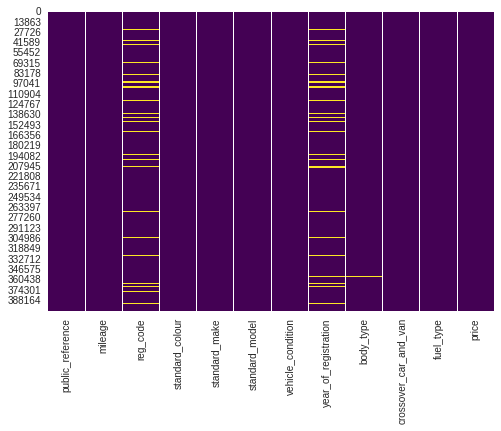

In [ ]:
DataProcess.Missing(data_df)

The DataProcess was used to drwan heat map for Missing values   
which shows features that have missing data with a stiches yellow color. the more the shades the higher the value of the missing values while those without it implies no missing values on that columns
To call the function, we use DataProcess.Missing (df) 


In [ ]:
data_df.isnull().sum()

public_reference             0
mileage                    127
reg_code                 31857
standard_colour           5378
standard_make                0
standard_model               0
vehicle_condition            0
year_of_registration     33311
body_type                  837
crossover_car_and_van        0
fuel_type                  601
price                        0
dtype: int64

data_df.isnull().sum() method.

The column "public_reference" has no missing values, while the "mileage" column has 127 missing values. The "reg_code" column has 31857 missing values, "standard_colour" column has 5378 missing values, while "year_of_registration" column has 33311 missing values. The "body_type" column has 837 missing values, "fuel_type" column has 601 missing values.

please note that having missing values in some features, could affect the performance of the our model if not handled properly. we have different ways of dealing with missimg values which will later make the dicission 

One way to handle missing values is to remove the rows with missing values, but this can lead to loss of information. Another way is to fill in the missing values with a default value, such as the mean or median of the column, or using the value of the previous or next row.

It's important to make a decision on how to handle the missing data based on the percentage of missing data, the column and the importance of the data for the problem being solved.

data_df.isna().any() display the missing values in boolen.



# **2. DATA PROCESSING FOR MACHINE LEARNING**

Let count the number of records for all the combination of unique values for the categorical features. 
using value_counts() is for frequency distributions -which is suitable for categorical features to know how uniformly they are distributed.
We have many categorical features in the dataframe and if i remove the lesser counts  as an outlier, it may affect the prediction. 
 Also dealing with Numerical features by using boxplots to identify how the data is been skeewed
 

In [ ]:
data_df['price'].value_counts()

8995     2432
7995     2377
6995     2369
9995     2340
5995     2249
         ... 
16253       1
44150       1
50340       1
76989       1
58987       1
Name: price, Length: 30578, dtype: int64

This code is using the Seaborn library to create a figure with a specified size, and then plotting a distribution of the "price" column in a DataFrame called "data_df" using a logarithmic scale on the y-axis. The distplot function of Seaborn is used to plot the distribution of a univariate set of observations, which in this case is the "price" column of the DataFrame. The log10 function from the numpy library is applied to the "price" column before it is plotted, which is why you see the "apply(np.log10)" part in the code. The purpose of taking the logarithm of the data is often to transform the data so that it better fits a normal distribution which allows for more accurate analysis and modeling.

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


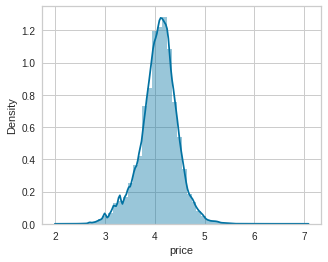

In [ ]:
plt.figure(figsize=(5, 4))
sns.distplot(data_df['price'].apply(np.log10));


This creat a box plot instead of a distribution plot. 
 using box plot which is a standardized way of displaying the distribution of data based on five number summary, which are:

The minimum value
The first quartile (Q1), also known as the lower quartile, which is the value that separates the lowest 25% of the data from the rest
The median, which is the value that separates the lowest 50% of the data from the highest 50%
The third quartile (Q3), also known as the upper quartile, which is the value that separates the highest 25% of the data from the rest
The maximum value

here the data is transformed by applying log10 function to the 'price' column, which is a better way of  visualizing the data if it has a large range of values and this transformation helps to better identify outliers or skewed data.

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


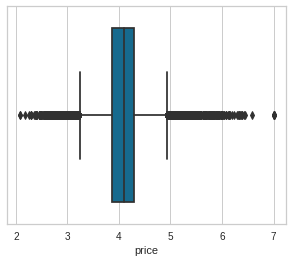

In [ ]:
plt.figure(figsize=(5, 4))
sns.boxplot(data_df['price'].apply(np.log10));


The "price" box plot shows that variable are skewed towards the upper and lower quartile with noise. upper quartile from 5 upward and lower quatile around 4.7 bellow, we need to clean the data to avoid the impact of outliers on the data and ensure that the model or analysis is not affected by these extreme. 


In [ ]:
data_df['mileage'].value_counts()


0.0        16207
10.0       12873
5.0         2434
60000.0     1609
50000.0     1580
           ...  
53660.0        1
72993.0        1
74437.0        1
66881.0        1
53460.0        1
Name: mileage, Length: 80634, dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


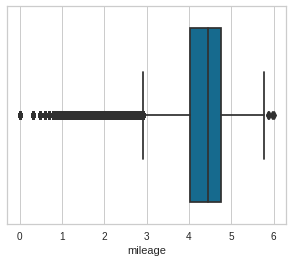

In [ ]:
plt.figure(figsize=(5, 4))
sns.boxplot(data_df['mileage'].apply(np.log10));


The "mileage" box plot shows that variable are skewed towards the lower quartile with noise. just little on the upper quartile, we need to clean the data to avoid the impact of outliers on the data and ensure that the model or analysis is not affected by these extreme values

Let do for nominal features (categorical data) using barplots and histplots

In [ ]:
data_df["standard_colour"].value_counts()

Black          86287
White          70535
Grey           68227
Blue           59784
Silver         49323
Red            42024
Green           4534
Orange          4088
Yellow          2097
Brown           2014
Multicolour     1854
Beige           1539
Bronze          1330
Purple          1211
Gold             818
Pink             410
Turquoise        307
Maroon           159
Burgundy          63
Magenta           15
Navy               7
Indigo             1
Name: standard_colour, dtype: int64

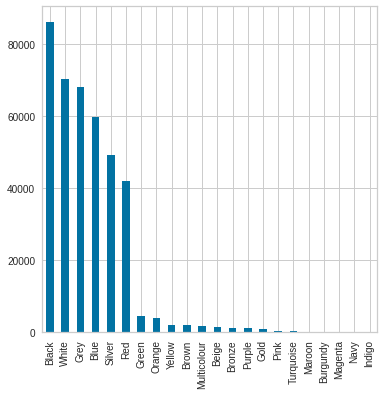

In [ ]:
figure  = plt.figure(figsize =(6,6))
data_df['standard_colour'].value_counts().plot.bar();

In [ ]:
from locale import normalize
data_df['standard_make'].value_counts(normalize=False)

BMW               37376
Audi              35280
Volkswagen        34246
Vauxhall          33700
Mercedes-Benz     31917
                  ...  
Bristol               1
Wolseley              1
Pagani                1
International         1
Custom Vehicle        1
Name: standard_make, Length: 110, dtype: int64

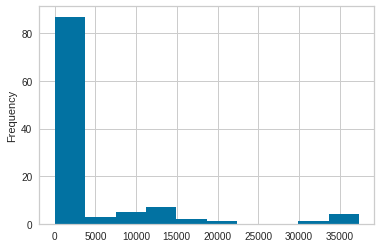

In [ ]:
figure  = plt.figure(figsize =(6,4))
data_df['standard_make'].value_counts().plot.hist();

The above graphs shows that there is high frequency of some particular standard_make of car. like BMW  having the higest occurnce of 37376 been sold followed by  Audi 35280, Volkswagen 34246 Vauxhall 33700 and Mercedes-Benz 31917in the "standard_make" variable with  frequency of about 95% that is higher than the others make This could be the  impact of outliers on the data whivh we need to deal with to ensure that the model or analysis is not affected by these extreme values.

In [ ]:
data_df["body_type"].value_counts()

Hatchback          167315
SUV                115872
Saloon              36641
Estate              24692
Coupe               23258
Convertible         16038
MPV                 16026
Pickup                620
Combi Van             214
Limousine             159
Minibus               149
Camper                 77
Panel Van              61
Window Van             41
Chassis Cab             3
Car Derived Van         2
Name: body_type, dtype: int64

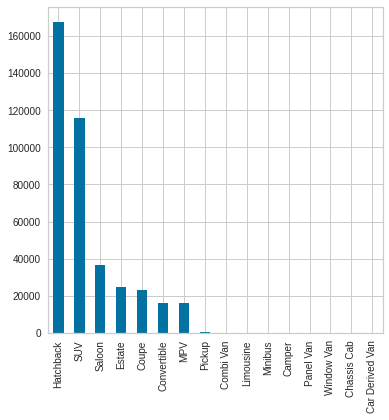

In [ ]:
figure  = plt.figure(figsize =(6,6))
data_df['body_type'].value_counts().plot.bar();

the plotbar shows that Hatchback has the higest raye of 
167315 follow by SUV  115872  till Pickup body type of car that the fequency is insignificant but that those not mean they wont have effect on our prediction therfore we need to be extra careful in dealing with them.

In [ ]:
data_df["vehicle_condition"].value_counts()

USED    370756
NEW      31249
Name: vehicle_condition, dtype: int64

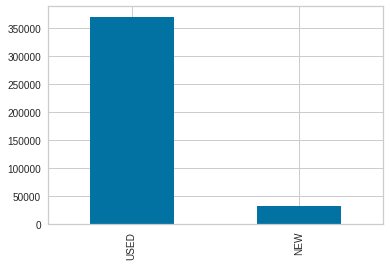

In [ ]:
figure  = plt.figure(figsize =(6,4))
data_df['vehicle_condition'].value_counts().plot.bar();

As you can see from above graph most of the car sold are used cars with 370756 of occurrence while others are new cars

In [ ]:
data_df["fuel_type"].value_counts()

Petrol                   216929
Diesel                   158120
Petrol Hybrid             13602
Petrol Plug-in Hybrid      6160
Electric                   4783
Diesel Hybrid              1403
Bi Fuel                     221
Diesel Plug-in Hybrid       185
Natural Gas                   1
Name: fuel_type, dtype: int64

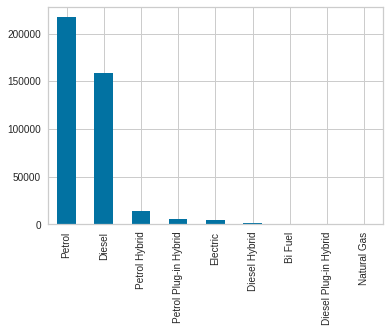

In [ ]:
figure  = plt.figure(figsize =(6,4))
data_df['fuel_type'].value_counts().plot.bar();

In [ ]:
data_df["reg_code"].value_counts()

17        36738
67        32230
66        25227
69        23825
18        21613
          ...  
723xuu        1
FW            1
m             1
85            1
p             1
Name: reg_code, Length: 72, dtype: int64

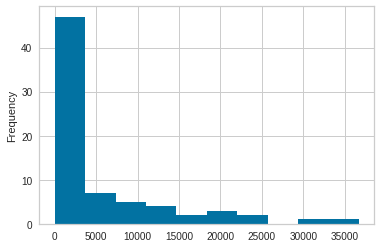

In [ ]:
figure  = plt.figure(figsize =(6,4))
data_df['reg_code'].value_counts().plot.hist();

In [ ]:
data_df["crossover_car_and_van"].value_counts()

False    400210
True       1795
Name: crossover_car_and_van, dtype: int64

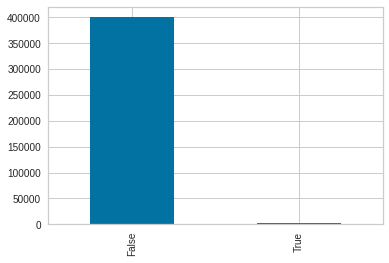

In [ ]:
figure  = plt.figure(figsize =(6,4))
data_df['crossover_car_and_van'].value_counts().plot.bar();

In [ ]:
null_columns=pd.DataFrame({'Columns':data_df.isna().sum().index,'No. Null values':data_df.isna().sum().values,'Percentage':(data_df.isna().sum().values/data_df.shape[0]) * 100})
null_columns

,Columns,No. Null values,Percentage
0,public_reference,0,0.000000
1,mileage,127,0.031592
2,reg_code,31857,7.924528
3,standard_colour,5378,1.337794
4,standard_make,0,0.000000
5,standard_model,0,0.000000
6,vehicle_condition,0,0.000000
7,year_of_registration,33311,8.286215
8,body_type,837,0.208206
9,crossover_car_and_van,0,0.000000


## 2.1 Dealing with missing values, outliers andv noise


**Dealing with missing value Mileage** query was passed by make_model and data_age because a car may have similar mileage with different car of the same make and model with same registration year

In [ ]:
data_df['mileage']=data_df.groupby(['standard_make','year_of_registration'])['mileage'].apply(lambda x:x.fillna(x.mean()))

In [ ]:
data_df['mileage'].mean()

40989.942567048674

In [ ]:
data_df['mileage']=data_df.groupby(['standard_make','fuel_type'])['mileage'].apply(lambda x:x.fillna(x.mode()))

In [ ]:
data_df['mileage'].fillna(data_df['mileage'].mean(), inplace=True)
data_df["mileage"].isna().sum()

0

In [ ]:
data_df['reg_code'].fillna(data_df['reg_code'].mode().iloc[0], inplace=True)
data_df['standard_colour'].fillna(data_df['standard_colour'].mode().iloc[0], inplace=True)
data_df['body_type'].fillna(data_df['body_type'].mode().iloc[0], inplace=True)
data_df['fuel_type'].fillna(data_df['fuel_type'].mode().iloc[0], inplace=True)
data_df['year_of_registration'].fillna(data_df['year_of_registration'].mode().iloc[0], inplace=True)

In [ ]:
data_df.isna().sum()

public_reference         0
mileage                  0
reg_code                 0
standard_colour          0
standard_make            0
standard_model           0
vehicle_condition        0
year_of_registration     0
body_type                0
crossover_car_and_van    0
fuel_type                0
price                    0
dtype: int64

### 2.1 Dealing with missing values, outliers and noise

The steps used to remove outliers in this section is:
* Use boxplot to display the feature
* Use the insight from the boxplot to remove the outlier 



In [ ]:
data_df['price']=data_df['price'].clip(lower=data_df['price'].quantile(0.1), upper=data_df['price'].quantile(0.9))


In [ ]:
data_df.isnull().sum()

public_reference         0
mileage                  0
reg_code                 0
standard_colour          0
standard_make            0
standard_model           0
vehicle_condition        0
year_of_registration     0
body_type                0
crossover_car_and_van    0
fuel_type                0
price                    0
dtype: int64

From above all the missing values have been taking care off, let now deal with the outliiers and noise below.

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


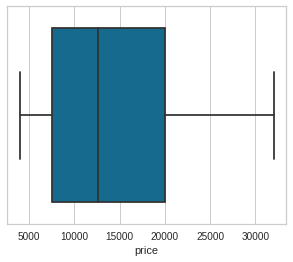

In [ ]:
plt.figure(figsize=(5, 4))
sns.boxplot(data_df['price'])


The above box plot shows the price feature of our data without the outliers and noise. It is noticeable that the average price is 14800, minimum of about 4,000, maximium price of 32,000, 75% ranges between 4000 and 20,000, 50% between 4000 and 12,600 and 25% between 4000 and 7500. 

In [ ]:
data_df['price'].max()

31990.0

In [ ]:
data_df['year_of_registration']=data_df['year_of_registration'].clip(lower=data_df['year_of_registration'].quantile(0.1), upper=data_df['year_of_registration'].quantile(0.9))

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


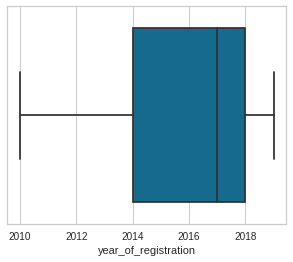

In [ ]:
plt.figure(figsize= (5,4))
plt.subplot(1,1,1)
sns.boxplot(data_df['year_of_registration'])

In [ ]:
data_df['mileage']=data_df['mileage'].clip(lower=data_df['mileage'].quantile(0.05), upper=data_df['mileage'].quantile(0.95))


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


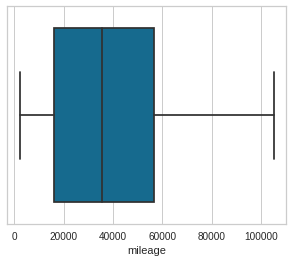

In [ ]:
plt.figure(figsize= (5,4))
plt.subplot(1,1,1)
sns.boxplot(data_df['mileage'])

Outliers have been removes along with noise and now our data for futher analysis

Note:Removing outliers and noise can help us ensure that the results are more accurate and representative of the underlying patterns in the data. Outliers, in particular, can skew the results and lead to false conclusions. Noise can also make it more difficult to identify patterns and relationships in the data. By removing these elements, it is possible to obtain a clearer and more reliable picture of the underlying trends and relationships in the data.
Because Outliers and noise can have a significant impact on the results of data analysis and modeling. 

Feature engineering is the process of transforming raw data into a format that can be easily understood and used by the model. such as creating new features by combining existing ones, normalizing data, and handling missing or outlier values. The goal of feature engineering is to create a set of relevant and informative features that can improve the performance of a machine learning model. It is a crucial step in the machine learning pipeline as the quality of the features can have a significant impact on the performance of the model.

## 2.2 Feature Enginearing, Data Transformation, Feature Selection

### **2.2.1 Feature Engineering**

let us make a  copy of our dataframe so that we do not make changes to the original dataset.


In [ ]:
trans_data_df=data_df.copy()


we can get the age of our vehicle from the year of registration. ref (https://en.wikipedia.org/wiki/Vehicle_registration_plates_of_the_United_Kingdom) 

we generate a new feature for the age of our vehicle (data_age). by using our age function created bellow


In [ ]:

from datetime import date
def age(year_of_registration):
    current_year = date.today().year
    age = current_year -  year_of_registration
    return age



In [ ]:
trans_data_df['data_age']= age(trans_data_df['year_of_registration'])


Since the standard_make and standard_model provide similar information. 
It will make more meaning by combining  them into one feature name (make_model)
by usinf the code bellow


In [ ]:
trans_data_df['make_model'] = trans_data_df['standard_make'].astype(str) + '_' + trans_data_df['standard_model']


Let see if the features created as been added to the dataset


In [ ]:
trans_data_df.head()


,public_reference,mileage,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,body_type,crossover_car_and_van,fuel_type,price,data_age,make_model
0,202006039777689,2310.0,17,Grey,Volvo,XC90,NEW,2017.0,SUV,False,Petrol Plug-in Hybrid,31990.0,6.0,Volvo_XC90
1,202007020778260,105000.0,61,Blue,Jaguar,XF,USED,2011.0,Saloon,False,Diesel,7000.0,12.0,Jaguar_XF
2,202007020778474,7800.0,17,Grey,SKODA,Yeti,USED,2017.0,SUV,False,Petrol,14000.0,6.0,SKODA_Yeti
3,202007080986776,45000.0,16,Brown,Vauxhall,Mokka,USED,2016.0,Hatchback,False,Diesel,7995.0,7.0,Vauxhall_Mokka
4,202007161321269,64000.0,64,Grey,Land Rover,Range Rover Sport,USED,2015.0,SUV,False,Diesel,26995.0,8.0,Land Rover_Range Rover Sport


since year_of registration gives us the same information as the data_age we created. therefore we can drop year_of registration to remove redundancy.
Also, we had combined standard_make and standard_model into one feature (make_model), we should also drop them. public_reference is just a nominal data adding no additional useful information to our data. It is just a form of identification, therefore we will also drop it.

In [ ]:
features_to_drop = [
  'public_reference' , 'year_of_registration', 'standard_make' , 'standard_model'];


In [ ]:
trans_data_df = trans_data_df.drop(columns=features_to_drop)


In [ ]:
trans_data_df.head()


,mileage,reg_code,standard_colour,vehicle_condition,body_type,crossover_car_and_van,fuel_type,price,data_age,make_model
0,2310.0,17,Grey,NEW,SUV,False,Petrol Plug-in Hybrid,31990.0,6.0,Volvo_XC90
1,105000.0,61,Blue,USED,Saloon,False,Diesel,7000.0,12.0,Jaguar_XF
2,7800.0,17,Grey,USED,SUV,False,Petrol,14000.0,6.0,SKODA_Yeti
3,45000.0,16,Brown,USED,Hatchback,False,Diesel,7995.0,7.0,Vauxhall_Mokka
4,64000.0,64,Grey,USED,SUV,False,Diesel,26995.0,8.0,Land Rover_Range Rover Sport


### 2.2.2 Data Transformation

#Importing the target encoder
from category_encoders import TargetEncoder
encoder = TargetEncoder()


Let us create a function to that takes the categorical features we want to encode and then encodes them.


In [ ]:
def target_encode(features):
  for feature in features:
    trans_data_df[feature + '_encoded'] = encoder.fit_transform(trans_data_df[feature], trans_data_df['price'])


In [ ]:
trans_data_df['vehicle_condition_encoded'] = encoder.fit_transform(trans_data_df['vehicle_condition'], trans_data_df['price'])
trans_data_df['crossover_car_and_van_encoded'] = encoder.fit_transform(trans_data_df['crossover_car_and_van'], trans_data_df['price'])
trans_data_df['standard_colour_encoded'] = encoder.fit_transform(trans_data_df['standard_colour'], trans_data_df['price'])
trans_data_df['body_type_encoded'] = encoder.fit_transform(trans_data_df['body_type'], trans_data_df['price'])
trans_data_df['fuel_type_encoded'] = encoder.fit_transform(trans_data_df['fuel_type'], trans_data_df['price'])
trans_data_df['make_model_encoded'] = encoder.fit_transform(trans_data_df['make_model'], trans_data_df['price'])
trans_data_df['reg_code'] = encoder.fit_transform(trans_data_df['reg_code'], trans_data_df['price'])

In [ ]:
trans_data_df.head()


,mileage,reg_code,standard_colour,vehicle_condition,body_type,crossover_car_and_van,fuel_type,price,data_age,make_model,vehicle_condition_encoded,crossover_car_and_van_encoded,standard_colour_encoded,body_type_encoded,fuel_type_encoded,make_model_encoded
0,2310.0,19528.700692,Grey,NEW,SUV,False,Petrol Plug-in Hybrid,31990.0,6.0,Volvo_XC90,25278.078563,False,16729.983306,19149.313993,26084.330032,27168.984985
1,105000.0,7158.026589,Blue,USED,Saloon,False,Diesel,7000.0,12.0,Jaguar_XF,13834.850298,False,14591.248612,17156.513741,15233.266804,15544.305441
2,7800.0,19528.700692,Grey,USED,SUV,False,Petrol,14000.0,6.0,SKODA_Yeti,13834.850298,False,16729.983306,19149.313993,13462.496984,10574.868773
3,45000.0,13603.810731,Brown,USED,Hatchback,False,Diesel,7995.0,7.0,Vauxhall_Mokka,13834.850298,False,12691.583913,10586.968463,15233.266804,7836.318491
4,64000.0,10835.247702,Grey,USED,SUV,False,Diesel,26995.0,8.0,Land Rover_Range Rover Sport,13834.850298,False,16729.983306,19149.313993,15233.266804,26734.092975


In [ ]:

features_to_drop = [
    'standard_colour' , 'vehicle_condition' ,'body_type' , 'crossover_car_and_van' , 'fuel_type' , 'make_model'];

In [ ]:
trans_data_df = trans_data_df.drop(columns=features_to_drop)

result after dropping few features from our dataset and left with encoded features

In [ ]:
trans_data_df.head()

,mileage,reg_code,price,data_age,vehicle_condition_encoded,crossover_car_and_van_encoded,standard_colour_encoded,body_type_encoded,fuel_type_encoded,make_model_encoded
0,2310.0,19528.700692,31990.0,6.0,25278.078563,False,16729.983306,19149.313993,26084.330032,27168.984985
1,105000.0,7158.026589,7000.0,12.0,13834.850298,False,14591.248612,17156.513741,15233.266804,15544.305441
2,7800.0,19528.700692,14000.0,6.0,13834.850298,False,16729.983306,19149.313993,13462.496984,10574.868773
3,45000.0,13603.810731,7995.0,7.0,13834.850298,False,12691.583913,10586.968463,15233.266804,7836.318491
4,64000.0,10835.247702,26995.0,8.0,13834.850298,False,16729.983306,19149.313993,15233.266804,26734.092975


In [ ]:
trans_data_df.crossover_car_and_van_encoded = trans_data_df.crossover_car_and_van_encoded.replace({True: 0, False:1})


In [ ]:
trans_data_df.head()


,mileage,reg_code,price,data_age,vehicle_condition_encoded,crossover_car_and_van_encoded,standard_colour_encoded,body_type_encoded,fuel_type_encoded,make_model_encoded
0,2310.0,19528.700692,31990.0,6.0,25278.078563,1,16729.983306,19149.313993,26084.330032,27168.984985
1,105000.0,7158.026589,7000.0,12.0,13834.850298,1,14591.248612,17156.513741,15233.266804,15544.305441
2,7800.0,19528.700692,14000.0,6.0,13834.850298,1,16729.983306,19149.313993,13462.496984,10574.868773
3,45000.0,13603.810731,7995.0,7.0,13834.850298,1,12691.583913,10586.968463,15233.266804,7836.318491
4,64000.0,10835.247702,26995.0,8.0,13834.850298,1,16729.983306,19149.313993,15233.266804,26734.092975


In [ ]:
trans_data_df = trans_data_df[['mileage', 'reg_code', 'data_age', 'standard_colour_encoded',
       'make_model_encoded', 'vehicle_condition_encoded',
       'body_type_encoded', 'crossover_car_and_van_encoded',
       'fuel_type_encoded',  'price']]

In [ ]:
trans_data_df.head()

,mileage,reg_code,data_age,standard_colour_encoded,make_model_encoded,vehicle_condition_encoded,body_type_encoded,crossover_car_and_van_encoded,fuel_type_encoded,price
0,2310.0,19528.700692,6.0,16729.983306,27168.984985,25278.078563,19149.313993,1,26084.330032,31990.0
1,105000.0,7158.026589,12.0,14591.248612,15544.305441,13834.850298,17156.513741,1,15233.266804,7000.0
2,7800.0,19528.700692,6.0,16729.983306,10574.868773,13834.850298,19149.313993,1,13462.496984,14000.0
3,45000.0,13603.810731,7.0,12691.583913,7836.318491,13834.850298,10586.968463,1,15233.266804,7995.0
4,64000.0,10835.247702,8.0,16729.983306,26734.092975,13834.850298,19149.313993,1,15233.266804,26995.0


In [ ]:
trans_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 402005 entries, 0 to 402004
Data columns (total 10 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   mileage                        402005 non-null  float64
 1   reg_code                       402005 non-null  float64
 2   data_age                       402005 non-null  float64
 3   standard_colour_encoded        402005 non-null  float64
 4   make_model_encoded             402005 non-null  float64
 5   vehicle_condition_encoded      402005 non-null  float64
 6   body_type_encoded              402005 non-null  float64
 7   crossover_car_and_van_encoded  402005 non-null  int64  
 8   fuel_type_encoded              402005 non-null  float64
 9   price                          402005 non-null  float64
dtypes: float64(9), int64(1)
memory usage: 30.7 MB


In [ ]:
print(trans_data_df[['price', 'data_age', 'mileage']].describe())

               price       data_age        mileage
count  402005.000000  402005.000000  402005.000000
mean    14724.365204       7.443791   39870.848577
std      8850.799045       2.933977   29315.522954
min      3995.000000       4.000000    2310.000000
25%      7495.000000       5.000000   15980.000000
50%     12600.000000       6.000000   35756.000000
75%     20000.000000       9.000000   56586.000000
max     31990.000000      13.000000  105000.000000


price maximium is 31990.0, minimium 3995.0
data_age maximium 13.0 , minimium 4.0
mileage maximium 105000.0 , minimium 2310.0

In [ ]:
trans_data_df_corr = trans_data_df.corr()
trans_data_df_corr

,mileage,reg_code,data_age,standard_colour_encoded,make_model_encoded,vehicle_condition_encoded,body_type_encoded,crossover_car_and_van_encoded,fuel_type_encoded,price
mileage,1.000000,-0.728807,0.773393,-0.076772,-0.131560,0.011071,-0.026930,-0.022381,-0.001330,-0.484037
reg_code,-0.728807,1.000000,-0.923964,0.138849,0.253662,0.251567,0.123572,0.006349,0.123628,0.626460
data_age,0.773393,-0.923964,1.000000,-0.144467,-0.230185,-0.142864,-0.102038,-0.009670,-0.113097,-0.580045
standard_colour_encoded,-0.076772,0.138849,-0.144467,1.000000,0.139819,0.065059,0.093690,0.006502,0.051496,0.177017
make_model_encoded,-0.131560,0.253662,-0.230185,0.139819,1.000000,0.141202,0.580734,-0.058889,0.258612,0.752005
vehicle_condition_encoded,0.011071,0.251567,-0.142864,0.065059,0.141202,1.000000,0.074666,0.007459,0.104567,0.346176
body_type_encoded,-0.026930,0.123572,-0.102038,0.093690,0.580734,0.074666,1.000000,-0.022619,0.139828,0.440947
crossover_car_and_van_encoded,-0.022381,0.006349,-0.009670,0.006502,-0.058889,0.007459,-0.022619,1.000000,-0.017724,-0.042513
fuel_type_encoded,-0.001330,0.123628,-0.113097,0.051496,0.258612,0.104567,0.139828,-0.017724,1.000000,0.263788
price,-0.484037,0.626460,-0.580045,0.177017,0.752005,0.346176,0.440947,-0.042513,0.263788,1.000000


Let check how our features are been **correlated agaist the Target (price)** 
From the correlation table let take our target price agaist other features, we can deduce that mileage have a negative correlation of approximately -0.5, make_model_encoded 0.8 strong correlation, body_type_encoded 0.5 correlation, data_age_encoded -0.6, standard_colour_encoded have 0.2, vehicle_condition_encoded 0.3, crossover_car_and_van_encoded -0.04, and fuel_type 0.3 correlation. from the analyisis we can see that the make_model_encoder as the higest positive correlation and data_age as the higest negative correlation             

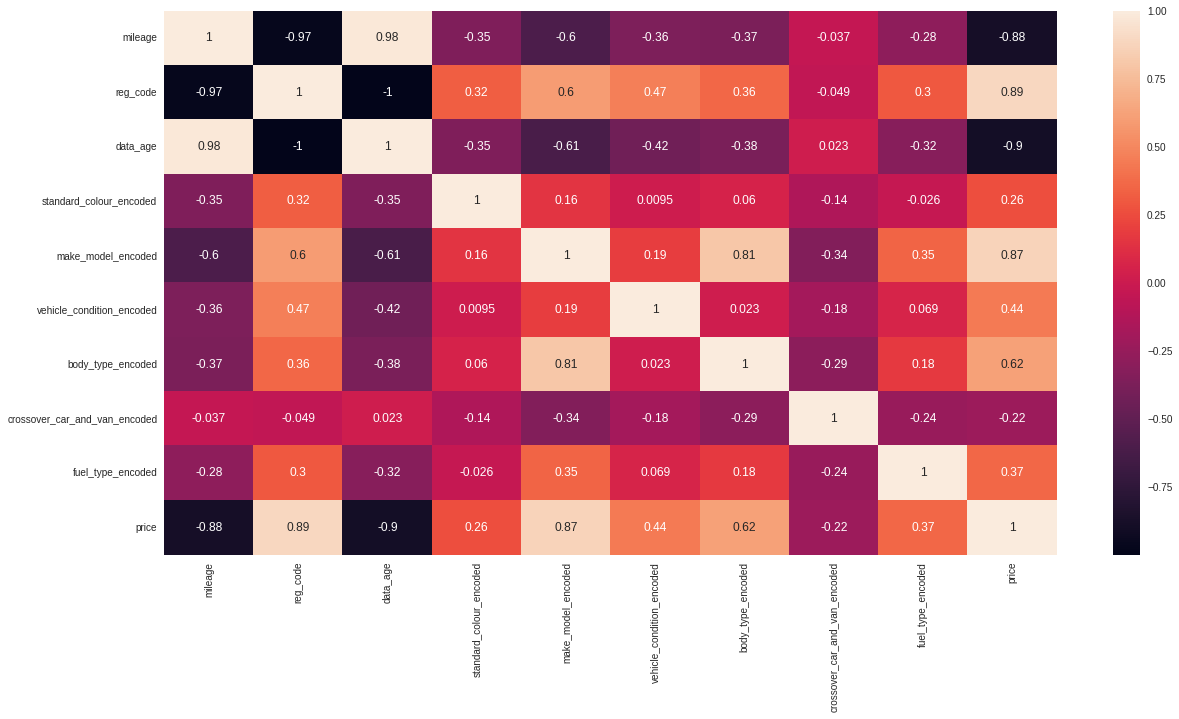

In [ ]:
DataProcess.correlation_map(trans_data_df_corr)

### 3. MODEL BUILDING

## 3.1. Algorithm Selection, Model Instantiation and Configuration

Analysis of Predictive Power of Features 

Spliting the dataset to features and target
which will give us an idea of which features are most important for predicting the price

In [ ]:
X = trans_data_df.drop([ 'price'], axis = 1)
y =trans_data_df ['price']

FEATURES SCALING(BETWEEN 0 & 1)

We need to scale our dataset in other to be uniform by using MinMaxScaler so that all the features are on a similar scale, which is usually between 0 and 1. It is done by subtracting the minimum value of the feature from all the observations, and then dividing the result by the range of the feature (the difference between the maximum and minimum values). This ensures that all the values for a given feature are between 0 and 1, and helps prevent one feature from dominating the others during model training. This method is useful when the data is skewed and some features are much larger than others.

In [ ]:
scaler = MinMaxScaler() 

X = scaler.fit_transform(X)

We only need to scale x 
we dont need to scale the target variable i.e, y beacause when training a model Scaling the target variable would change its values, making it difficult to interpret the model's predictions. The target variable is what the model is trying to predict, so it should be in its original form. Instead, only the input features x should be scaled, so that the model can better learn the relationship between the inputs and the target.

Additionally, scaling the target variable could cause the model to learn an arbitrary relationship between inputs and scaled outputs, rather than the true relationship between inputs and outputs.

In [ ]:
#let see the output of our x features which are now in array
X

array([[0.        , 0.72637543, 0.22222222, ..., 0.61911668, 1.        ,
        0.77841098],
       [1.        , 0.07763236, 0.88888889, ..., 0.47502347, 1.        ,
        0.1162424 ],
       [0.05346188, 0.72637543, 0.22222222, ..., 0.61911668, 1.        ,
        0.00818404],
       ...,
       [0.49128445, 0.12220062, 0.77777778, ..., 0.61911668, 1.        ,
        0.00818404],
       [0.07732009, 0.36828361, 0.44444444, ..., 0.        , 1.        ,
        0.00818404],
       [0.11383776, 0.24933971, 0.55555556, ..., 0.32800921, 1.        ,
        0.1162424 ]])

Let dispaly our target y

In [ ]:
display (y)

0         31990.0
1          7000.0
2         14000.0
3          7995.0
4         26995.0
           ...   
402000    10595.0
402001     3995.0
402002     7250.0
402003    11490.0
402004    20520.0
Name: price, Length: 402005, dtype: float64

# 3.2. Grid Search, and Model Ranking and Selection

#4 Model Evaluation and Analysis 

**Splitting the datset to features Train, Test data**

Let Unpacking our dataset by spliting the dataset  to features X_train, X_test, y_train, y_test., random_state will ensure that the same split is used each time we run the code, even if we rerun the function multiple times it will reproduce the same results

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.75, random_state= 25)

Let check the validation of the spliting dataset

In [ ]:
 X_test_val, X_val, y_test_val, y_val =  train_test_split( X_test, y_test, train_size = 0.5, random_state= 50)

Let return the number of rows and columns in the X_train, X_test, y_train, y_test and X_test_val, X_val, y_test_val, y_val using .shape

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

print('==================')

    
print(X_test_val.shape)
print(X_val.shape)
print(y_test_val.shape)
print(y_val.shape)

(301503, 9)
(100502, 9)
(301503,)
(100502,)
(50251, 9)
(50251, 9)
(50251,)
(50251,)


From above we can see that the x_train as 301503 rows with 9 columns x_test have 100502 rows with 9 , y_train as 301503 rows and y_test as 100502 rows.For the validation x_test_val has 50251 rows with 9 columns and so on. 

The validation dataset has  been split into 50:50 ratio, meaning that half of the data in x_test_val will be used for validation purposes, and the other half will be used for testing. This split is used to ensure that the model is able to generalize well to new, unseen data. By using this separate validation set, we can get an estimate of how well the model is likely to perform on new data, before we actually use it to make predictions on unseen test data.





#4.1 Coarse-Grained Evaluation/Analysis

# Setup cross validation and define error metrics

Let perform the best performing model by creating a list models using different types of regressors the purpose is to see which of the regressors model will give me the best accuracy for my dataset, by comparing the performance of each model and select the one with the highest accuracy.

We find the score by using mean_squared_error for the y test and y prediction,then print the each score of each of the models and round it up to 2 decimal values, then i call the models.

In [ ]:
models = [RandomForestRegressor(), LinearRegression(), DecisionTreeRegressor(), GradientBoostingRegressor(), AdaBoostRegressor() ]

In [ ]:
def compare_models():

    for model in models:
    
        model.fit(X_train, y_train)
    
        y_pred = model.predict(X_test)
    
        score =  mean_squared_error(y_test, y_pred)    
    
        print('Score of   ', model, 'is  ', score)

In [ ]:
compare_models()

Score of    RandomForestRegressor() is   4218527.120951789
Score of    LinearRegression() is   14728680.337437022
Score of    DecisionTreeRegressor() is   7135025.546178066
Score of    GradientBoostingRegressor() is   9285185.0659412
Score of    AdaBoostRegressor() is   24273211.724988457


From the result displayed, it shows that RandomForestRegressor has the lowest score, it's then taken as the best model.

I also used cross-validation to evaluate the accuracy of the model using 5-fold. That is the data is divided into 5 equal-sized folds The model is trained on 5-1 of the folds and tested on the remaining one and this process is repeated 5 times, with a different fold being used as the test set in each iteration. The results are then averaged to give an estimate of the model's performance.



In [ ]:
def compare_cv():
    
    for model in models:
        
        cv_score = cross_val_score(model, X, y, cv = 5)
        
        mean_score = sum(cv_score) / len(cv_score)
        
        mean_score = (mean_score * 100)
        
        mean_score = np.round(mean_score, 2)
        
        print('Cross Validation score for ',model, ' =     ', cv_score)
        
        print('score % of the  ', model, mean_score)
        
        print('===============================================================================================================')

Query was to compare the cross validation scores

In [ ]:
 compare_cv()

Cross Validation score for  RandomForestRegressor()  =      [0.94697761 0.94618542 0.94714463 0.94800193 0.94653589]
score % of the   RandomForestRegressor() 94.7
Cross Validation score for  LinearRegression()  =      [0.81003741 0.80947423 0.81301043 0.81229279 0.81135854]
score % of the   LinearRegression() 81.12
Cross Validation score for  DecisionTreeRegressor()  =      [0.91162703 0.91073165 0.91159166 0.91327821 0.91067445]
score % of the   DecisionTreeRegressor() 91.16
Cross Validation score for  GradientBoostingRegressor()  =      [0.88040762 0.88113145 0.88300322 0.88221619 0.88066859]
score % of the   GradientBoostingRegressor() 88.15
Cross Validation score for  AdaBoostRegressor()  =      [0.69638106 0.6949581  0.66406739 0.68664267 0.64548143]
score % of the   AdaBoostRegressor() 67.75


From above scores Random forest scored the highest  cross validation score approximately 95%

In [ ]:
RF = RandomForestRegressor()

RF.fit(X_train, y_train)

prediction= RF.predict(X_test)

In [ ]:
prediction

array([15672.82,  5255.12,  5067.79, ..., 19426.44,  8763.99,  8313.26])

predicting was carried out by testing with our x_test for the first 3 rows and  the last 3 rows respectively approximately 15,673 ,  5,255, 5,068,..., 19,426, 8,764, and 8,313

The RandomForestRegressor is the best model for the normal normal ML model training because it has the lowest mean squared error, as for the cross-validation the random forest regressor also performed best. 

#4.2. Feature Importance 

Let Identify the best performing model Creating the feature importances plot

After ruining the models i noticed that random forest give the best accuracy of about 95%. which is the best model to use.After that i tried to improve  the accuracy by using yellow bricks by selecting  the best 10 features for the predictions  

we assign visualizer to feature importances using camel style and input the best model called random forest using maximum depth to be 5

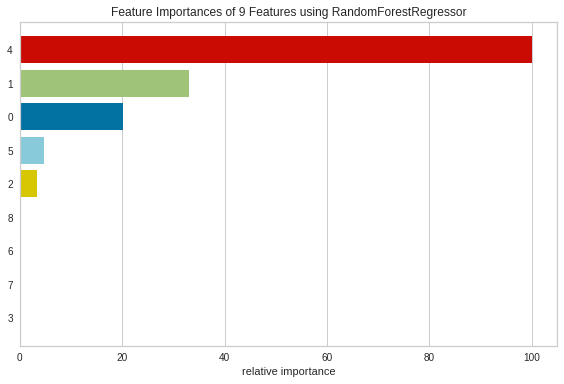

In [ ]:
visualizer = FeatureImportances(RandomForestRegressor(max_depth=5),
                                relative=True)

visualizer.fit(X_val, y_val)

# Saving plot in PNG format
visualizer.show(outpath="Feature_Importances_Plot.png")

Therefore, only 5 features were relatively important which are as follow make_model, reg_code, mileage, vehicle_condition, data_age respectively'.

Another dataframe was created named trans_data_df_feat_imp and input all the 5  features including the Target

In [ ]:
trans_data_df_feat_imp = trans_data_df[['data_age', 'reg_code', 'mileage', 'vehicle_condition_encoded', 'make_model_encoded', 'price']]

In [ ]:
#the first 5 rows was displayed
trans_data_df_feat_imp.head()

,data_age,reg_code,mileage,vehicle_condition_encoded,make_model_encoded,price
0,6.0,19528.700692,2310.0,25278.078563,27168.984985,31990.0
1,12.0,7158.026589,105000.0,13834.850298,15544.305441,7000.0
2,6.0,19528.700692,7800.0,13834.850298,10574.868773,14000.0
3,7.0,13603.810731,45000.0,13834.850298,7836.318491,7995.0
4,8.0,10835.247702,64000.0,13834.850298,26734.092975,26995.0


Repeating  what we did earler for the new dataset including the target

#Model Evaluation and Analysis

In [ ]:
X = trans_data_df_feat_imp.drop('price', axis = 1)

y = trans_data_df_feat_imp.price

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state= 42)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(281403, 5)
(120602, 5)
(281403,)
(120602,)


In [ ]:
sc = MinMaxScaler() 

X_train = sc.fit_transform(X_train)

X_test =  sc.fit_transform(X_test)

In [ ]:
random_forest = RandomForestRegressor()

random_forest.fit(X_train, y_train)

RandomForestRegressor()

So now predicting by testing with our x_test 

In [ ]:
y_pred_rf = random_forest.predict(X_test)

so let slice by checking the first 12 prediction 

In [ ]:
print(list(y_pred_rf)[:12])

[24174.57452380952, 16919.18, 5118.73, 11122.21, 5013.187274024994, 10074.138333333332, 4590.676170634922, 31951.4545014375, 13195.8, 13074.56, 22148.885718435104, 9534.0]


we can see the prices of our cars for the first 12 rows and the prices of the cars for the 12 first rows was approximately 
24,175 ,  16,920, 5,119, 11,122, 5,013, 10,074, 4,591, 31,951, 13,196, 13,075, 22,148, and 9,534 pounds


#4.3 Fine-Grained Evaluation

In [ ]:
score_rmse = np.sqrt(mean_squared_error(y_test, y_pred_rf))
print(score_rmse)

2453.7151843370298


This means that the error in price of any of the cars is about 2500 pounds

let check if our model is not overfitting with training data and cross validation by ploting the validation curve, setting n_jobs to -1 that is let the function to use all available processor. with cross validation of 10 folds and assigned the scoring to be negive mean squared error 

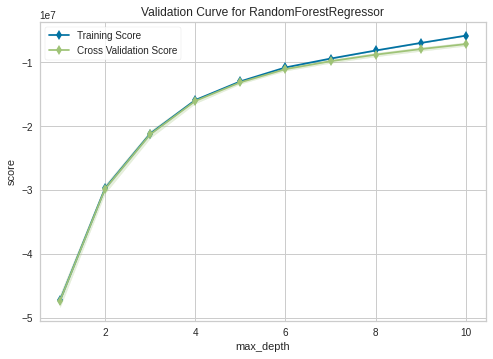

In [ ]:
visualizer = ValidationCurve(RandomForestRegressor(), 
                             param_name="max_depth", n_jobs=-1,
                             param_range=np.arange(1, 11), 
                             cv=10, scoring="neg_mean_squared_error")

visualizer.fit(X_val, y_val)

# Saving plot in PNG format
visualizer.show(outpath="Validation_Curve.png")

As observed, cross validation score and training score are very close. This shows the usefulness of cross validation. It allows us to compare training loss and testing loss. It means our model is in order to predict the best target.

Without even the hyperparameters tuning, our model yields 94.7% this is really enchanting!

Now let use the hyperparameter tuning (grid search) to know the perfect hyper parameters that can increase the random forest model, initially we get 95% but not satisfied. so want to use grid search to know which one will be the best parameter to use. That is why i created another random forest called rf and assigned to RandomForestRegressor(random_state = 50) to make it constant

In [ ]:
rf = RandomForestRegressor(random_state = 50 )

# Looking at parameters used by our current randomforest
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 50,
 'verbose': 0,
 'warm_start': False}


pprint was used to get all the hyper parameters inside the random forest geting a dictionary containing all the hyperparameters and their current values. The pprint function is then used to print the dictionary in a more human-readable format. The output will contain various hyperparameter name with their current value as follow

Number of trees in random forest (n_estimators), Number of features to consider at every split(Maximium_features) auto and sqrt, Maximum number of levels in tree(max_depth), Minimum number of samples required to split a node
(min_samples_split), Minimum number of samples required at each leaf node
(min_samples_leaf), Method of selecting samples for training each tree
(bootstrap). The forest grid containing the keys and values of all the hyper parameters will be listed out

In [ ]:
n_estimators = [int(x) for x in np.linspace(start = 120, stop = 1500, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 10)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]
forest_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [ ]:
pprint(forest_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 21, 32, 43, 54, 65, 76, 87, 98, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [120, 273, 426, 580, 733, 886, 1040, 1193, 1346, 1500]}


we call all the 
Grid search of parameters, using 5 fold cross validation, 
search across 100 different combinations, and use all available cores
Fit the Grid search model with comprehensive output

In [ ]:
rf_random = GridSearchCV(estimator = rf, param_grid = forest_grid,  cv = 5, verbose=2,  n_jobs = -1)
rf_random.fit(X, y)